In [2]:
from pymongo import MongoClient
import pymongo
import pandas as pd
import re
from collections import Counter
import math
import numpy as np
from sshtunnel import SSHTunnelForwarder
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

In [3]:
from xgboost import XGBClassifier
model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')
print("GPU 設定成功")


GPU 設定成功


In [5]:
#讀取
df = pd.read_excel("data_clearned.xlsx")
df

,Unnamed: 0,縣市,簽約租金,鄉鎮市區,出租人年齡,建物型態,屋齡,幾房,實際使用坪數,是否為弱勢身分,承租人年齡,高齡者,KMeans_生活型態分群,是否電梯大樓
0,0,高雄市,20349,前鎮區,46,透天厝,31,4,56.044175,0,50,0,2,0
1,1,高雄市,20009,前鎮區,49,透天厝,32,4,56.044175,0,52,0,2,0
2,2,高雄市,19808,前鎮區,52,透天厝,36,4,56.044175,0,56,0,2,0
3,3,高雄市,7990,苓雅區,59,公寓,36,4,26.399175,1,65,1,2,0
4,4,高雄市,9931,鳳山區,35,公寓,36,2,29.971700,0,48,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,8593,高雄市,17960,三民區,47,住宅大樓（十一層(含)以上有電梯）,29,2,35.177725,0,34,0,2,1
8594,8594,高雄市,13002,前鎮區,65,公寓,36,3,26.822675,1,50,0,2,0
8595,8595,高雄市,16001,楠梓區,49,住宅大樓（十一層(含)以上有電梯）,15,1,21.223400,1,41,0,1,1
8596,8596,高雄市,17997,鳳山區,51,公寓,38,2,22.279125,0,36,0,2,0


In [6]:
testdf_3 = df

In [7]:
print("總樣本數  高齡者  比例")
print(len(testdf_3), sum(testdf_3['高齡者']), round((sum(testdf_3['高齡者']) / len(testdf_3)) * 100, 1) if len(testdf_3) > 0 else 0)

總樣本數  高齡者  比例
8598 434 5.0


In [8]:
testdf_3.columns

Index(['Unnamed: 0', '縣市', '簽約租金', '鄉鎮市區', '出租人年齡', '建物型態', '屋齡', '幾房',
       '實際使用坪數', '是否為弱勢身分', '承租人年齡', '高齡者', 'KMeans_生活型態分群', '是否電梯大樓'],
      dtype='object')


Early stopping occurred at epoch 52 with best_epoch = 22 and best_val_0_auc = 0.61341

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_auc = 0.58536

Early stopping occurred at epoch 31 with best_epoch = 1 and best_val_0_auc = 0.59192
[Search 01/4] AUC=0.5969 model={'optimizer_params': {'lr': 0.01, 'weight_decay': 0.0}, 'optimizer_fn': <class 'torch.optim.adamw.AdamW'>, 'n_steps': 3, 'n_d': 32, 'n_a': 8, 'mask_type': 'sparsemax', 'lambda_sparse': 0.001, 'gamma': 1.25} fit={'virtual_batch_size': 128, 'patience': 30, 'max_epochs': 120, 'batch_size': 512}

Early stopping occurred at epoch 33 with best_epoch = 3 and best_val_0_auc = 0.59611

Early stopping occurred at epoch 67 with best_epoch = 37 and best_val_0_auc = 0.61965

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_auc = 0.56655
[Search 02/4] AUC=0.5941 model={'optimizer_params': {'lr': 0.001, 'weight_decay': 0.0001}, 'optimizer_fn': <class 'torch.optim.adamw.AdamW'>, 'n_steps': 5, '

  0%|          | 0/860 [00:00<?, ?it/s]

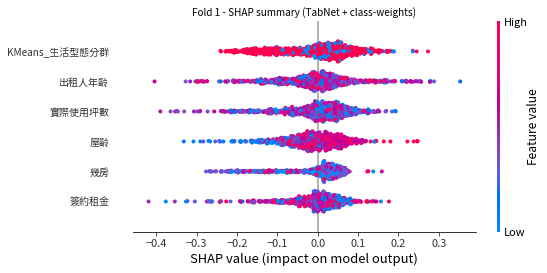

最佳閥值: 0.4449
準確率: 0.5977, 精確度: 0.0849, 召回率: 0.7209, F1-score: 0.1520, AUC: 0.6631

===== 第 2 折交叉驗證 =====

Early stopping occurred at epoch 114 with best_epoch = 84 and best_val_0_auc = 0.67487


  0%|          | 0/860 [00:00<?, ?it/s]

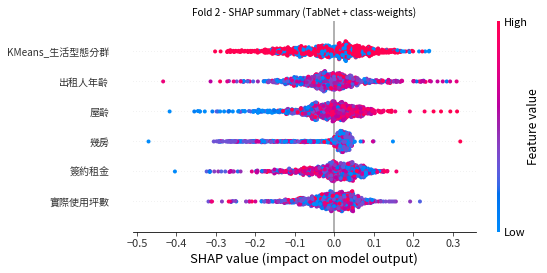

最佳閥值: 0.4454
準確率: 0.5988, 精確度: 0.0874, 召回率: 0.7442, F1-score: 0.1565, AUC: 0.6749

===== 第 3 折交叉驗證 =====

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_auc = 0.61157


  0%|          | 0/860 [00:00<?, ?it/s]

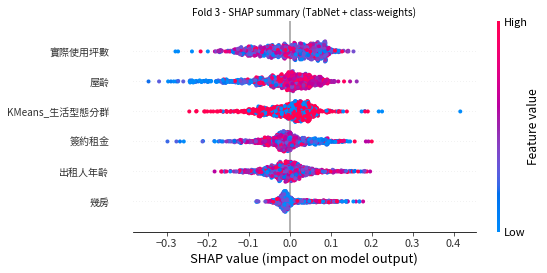

最佳閥值: 0.5437
準確率: 0.6977, 精確度: 0.0843, 召回率: 0.5116, F1-score: 0.1447, AUC: 0.6116

===== 第 4 折交叉驗證 =====

Early stopping occurred at epoch 84 with best_epoch = 54 and best_val_0_auc = 0.6143


  0%|          | 0/860 [00:00<?, ?it/s]

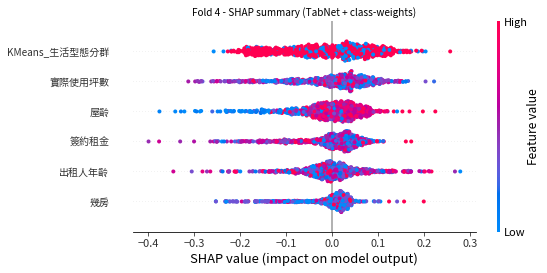

最佳閥值: 0.3356
準確率: 0.4477, 精確度: 0.0663, 召回率: 0.7674, F1-score: 0.1220, AUC: 0.6143

===== 第 5 折交叉驗證 =====

Early stopping occurred at epoch 54 with best_epoch = 24 and best_val_0_auc = 0.59467


  0%|          | 0/860 [00:00<?, ?it/s]

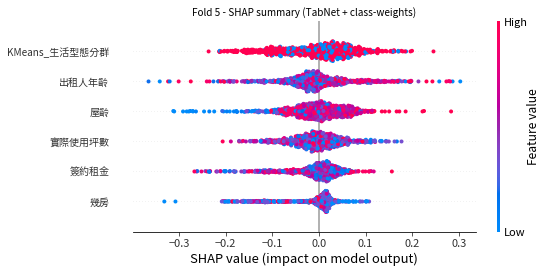

最佳閥值: 0.5406
準確率: 0.7198, 精確度: 0.0809, 召回率: 0.4318, F1-score: 0.1362, AUC: 0.5947

===== 第 6 折交叉驗證 =====

Early stopping occurred at epoch 84 with best_epoch = 54 and best_val_0_auc = 0.62386


  0%|          | 0/860 [00:00<?, ?it/s]

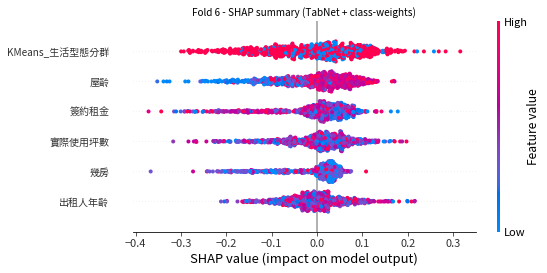

最佳閥值: 0.5148
準確率: 0.7267, 精確度: 0.1004, 召回率: 0.5455, F1-score: 0.1696, AUC: 0.6239

===== 第 7 折交叉驗證 =====

Early stopping occurred at epoch 63 with best_epoch = 33 and best_val_0_auc = 0.67045


  0%|          | 0/860 [00:00<?, ?it/s]

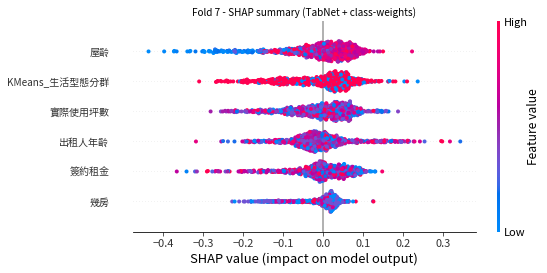

最佳閥值: 0.4635
準確率: 0.5349, 精確度: 0.0841, 召回率: 0.8182, F1-score: 0.1525, AUC: 0.6705

===== 第 8 折交叉驗證 =====

Early stopping occurred at epoch 83 with best_epoch = 53 and best_val_0_auc = 0.64815


  0%|          | 0/860 [00:00<?, ?it/s]

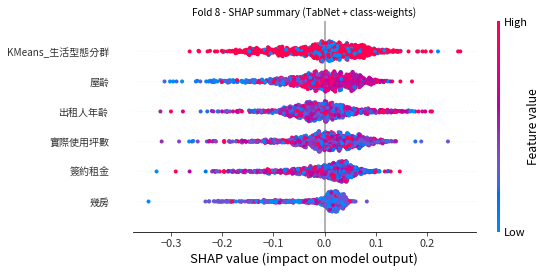

最佳閥值: 0.2361
準確率: 0.3279, 精確度: 0.0680, 召回率: 0.9545, F1-score: 0.1269, AUC: 0.6481

===== 第 9 折交叉驗證 =====

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_auc = 0.67941


  0%|          | 0/859 [00:00<?, ?it/s]

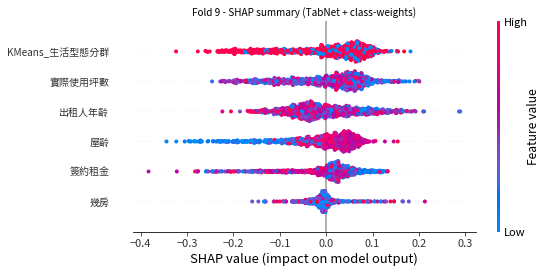

最佳閥值: 0.6600
準確率: 0.7870, 精確度: 0.1154, 召回率: 0.4884, F1-score: 0.1867, AUC: 0.6794

===== 第 10 折交叉驗證 =====

Early stopping occurred at epoch 48 with best_epoch = 18 and best_val_0_auc = 0.60137


  0%|          | 0/859 [00:00<?, ?it/s]

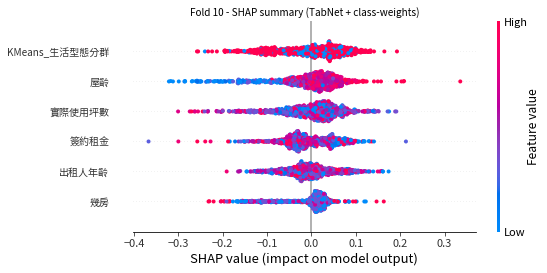

最佳閥值: 0.4860
準確率: 0.4738, 精確度: 0.0677, 召回率: 0.7442, F1-score: 0.1240, AUC: 0.6014

===== TabNet（class-weights CE） 總平均指標與 95% CI =====
accuracy   平均: 0.5912 | 95% CI: [0.5008, 0.6816]
precision  平均: 0.0839 | 95% CI: [0.0744, 0.0934]
recall     平均: 0.6727 | 95% CI: [0.5681, 0.7773]
f1         平均: 0.1471 | 95% CI: [0.1342, 0.1600]
roc_auc    平均: 0.6382 | 95% CI: [0.6180, 0.6584]

===== 平均特徵重要性 (SHAP across folds, TabNet + class-weights CE) =====
         Feature  Mean SHAP Importance
1  KMeans_生活型態分群              0.067964
0             屋齡              0.056806
2         實際使用坪數              0.055746
3          出租人年齡              0.052043
4           簽約租金              0.047987
5             幾房              0.038117


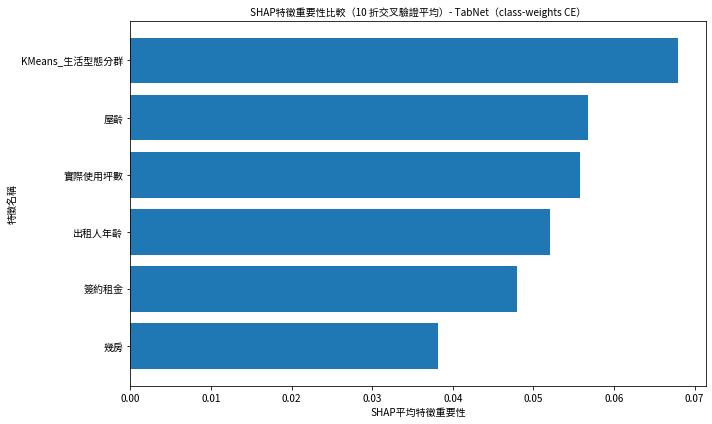

In [9]:
# =========================================
# TabNet + Class Weights（CrossEntropyLoss）版（不做 SMOTE）+ SHAP 修正
# =========================================
# pip install pytorch-tabnet torch shap scikit-learn matplotlib pandas numpy

import os
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

# --------- 字型（思源黑體繁體，避免中文亂碼） ---------
font_url = 'https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/TraditionalChinese/SourceHanSansTC-Regular.otf'
font_path = 'SourceHanSansTC-Regular.otf'
if not os.path.exists(font_path):
    print("正在下載字體...")
    urllib.request.urlretrieve(font_url, font_path)
    print("字體下載完成！")
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()

# --------- 其餘 import ---------
import numpy as np
import pandas as pd
import shap
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import StratifiedKFold, ParameterSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import torch
from torch import nn
from pytorch_tabnet.tab_model import TabNetClassifier

# 固定隨機種子
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# -----------------------------
# 特徵與目標（依你的欄位）
# -----------------------------
SAS_vars = ['屋齡', 'KMeans_生活型態分群', '實際使用坪數', '出租人年齡', '簽約租金', '幾房']
TARGET = '高齡者'

# 假設你已載入 testdf_3（DataFrame）
X_full = testdf_3[SAS_vars].copy()
y_full = testdf_3[TARGET].astype(int).copy()

# 類別/數值欄位定義
cat_var = 'KMeans_生活型態分群'
num_vars = [c for c in SAS_vars if c != cat_var]

# 類別整體整數編碼（固定映射，避免跨 fold 漂移）
X_full[cat_var] = X_full[cat_var].astype('category')
X_full[cat_var] = X_full[cat_var].cat.codes.astype(int)
n_categories = int(X_full[cat_var].nunique())

# TabNet 類別索引（放在輸入矩陣最後一欄）
cat_idx = [len(num_vars)]
cat_dims = [n_categories]

# -----------------------------
# 手動隨機搜尋（分開 model_params / fit_params）
#   用 CrossEntropyLoss + class weights（不做 SMOTE）
# -----------------------------
search_space_model = {
    'n_d': [8, 16, 24, 32],
    'n_a': [8, 16, 24, 32],
    'n_steps': [3, 4, 5, 6],
    'gamma': [1.0, 1.25, 1.5, 1.75],
    'lambda_sparse': [1e-6, 1e-5, 1e-4, 1e-3],
    'mask_type': ['sparsemax', 'entmax'],
    # AdamW 往往更穩；你也可改回 Adam
    'optimizer_fn': [torch.optim.AdamW],
    'optimizer_params': [{'lr': lr, 'weight_decay': wd} for lr in [3e-4, 1e-3, 3e-3, 1e-2] for wd in [0.0, 1e-4]],
    # 如需 scheduler 可另外加 'scheduler_fn' / 'scheduler_params'
}
search_space_fit = {
    'batch_size': [512, 1024],
    'virtual_batch_size': [128, 256],
    'max_epochs': [120],    # 拉高，避免太早 early stop
    'patience': [30],
}

def sample_param_pairs(n_iter=24, seed=RANDOM_STATE):
    rng = np.random.RandomState(seed)
    mlist = list(ParameterSampler(search_space_model, n_iter=n_iter, random_state=rng))
    flist = list(ParameterSampler(search_space_fit,   n_iter=n_iter, random_state=rng))
    return list(zip(mlist, flist))

def build_xy_mats(df_tr, df_va):
    """數值標準化 + 類別保留整數，組合為 [數值..., 類別]"""
    scaler = StandardScaler()
    X_tr_num = scaler.fit_transform(df_tr[num_vars].values)
    X_va_num = scaler.transform(df_va[num_vars].values)
    X_tr_cat = df_tr[[cat_var]].values.astype(int)
    X_va_cat = df_va[[cat_var]].values.astype(int)
    X_tr_mat = np.hstack([X_tr_num, X_tr_cat])
    X_va_mat = np.hstack([X_va_num, X_va_cat])
    return X_tr_mat, X_va_mat

def make_ce_loss_from_y(y_train):
    """依當前訓練集計算 class weights，建立 CrossEntropyLoss"""
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    # 以「正類權重 = neg/pos；負類=1」為例（可再正規化）
    w_pos = (neg / max(1, pos))
    w_neg = 1.0
    weights = torch.tensor([w_neg, w_pos], dtype=torch.float)
    return nn.CrossEntropyLoss(weight=weights)

def quick_auc(model_params, fit_params, X_df, y):
    """3-fold 快速 AUC 評估（不做 SMOTE，使用 class-weighted CE）"""
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
    aucs = []
    for tr_idx, va_idx in cv.split(X_df, y):
        X_tr_df, X_va_df = X_df.iloc[tr_idx], X_df.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx].values, y.iloc[va_idx].values
        X_tr_mat, X_va_mat = build_xy_mats(X_tr_df, X_va_df)
        loss_fn = make_ce_loss_from_y(y_tr)

        clf = TabNetClassifier(
            cat_idxs=cat_idx, cat_dims=cat_dims, cat_emb_dim=3,
            seed=RANDOM_STATE, verbose=0, **model_params
        )
        clf.fit(
            X_tr_mat, y_tr,                          # y 為 0/1 整數標籤
            eval_set=[(X_va_mat, y_va)],
            eval_metric=['auc'],
            loss_fn=loss_fn,                         # ★ 關鍵：class-weighted CE
            batch_size=fit_params['batch_size'],
            virtual_batch_size=fit_params['virtual_batch_size'],
            max_epochs=fit_params['max_epochs'],
            patience=fit_params['patience'],
            num_workers=0, drop_last=False
        )
        y_proba = clf.predict_proba(X_va_mat)[:, 1]
        aucs.append(roc_auc_score(y_va, y_proba))
    return float(np.mean(aucs))

# 目標門檻（你可調整）
TARGET_AUC = 0.64
pairs = sample_param_pairs(n_iter=24)
best_model_params, best_fit_params, best_auc = None, None, -np.inf

for i, (mp, fp) in enumerate(pairs, 1):
    try:
        auc = quick_auc(mp, fp, X_full, y_full)
        print(f"[Search {i:02d}/{len(pairs)}] AUC={auc:.4f} model={mp} fit={fp}")
        if auc > best_auc:
            best_auc, best_model_params, best_fit_params = auc, mp, fp
        if best_auc >= TARGET_AUC:
            print(f"🎯 達標停止（AUC={best_auc:.4f}）")
            break
    except Exception as e:
        print(f"[Search {i:02d}] 跳過：{e}")

if best_model_params is None:
    raise RuntimeError("搜尋皆失敗，請檢查安裝版本或縮小搜尋空間。")

print("\n===== 最佳超參數（TabNet + class-weight CE）=====")
print("model_params:", best_model_params)
print("fit_params  :", best_fit_params)
print(f"CV AUC ≈ {best_auc:.4f}")

# -----------------------------
# 10 折交叉驗證 + SHAP（維持你的評估流程）
# -----------------------------
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': [], 'best_threshold': []}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

all_shap_values = []
all_feature_names = SAS_vars

# SHAP 控制
BACKGROUND_K = 50
SHAP_TEST_LIMIT = 1500
SHAP_NSAMPLES = 200

def mean_ci(arr):
    arr = np.asarray(arr, dtype=float)
    m = np.mean(arr)
    sem = np.std(arr, ddof=1) / np.sqrt(len(arr))
    mar = 1.96 * sem
    return m, m - mar, m + mar

def ensure_shap_matrix(values, n_features_expected):
    if hasattr(values, "values"):
        arr = values.values
    elif isinstance(values, list):
        if len(values) != 1:
            raise ValueError(f"Expect single-output SHAP, got list len={len(values)}.")
        arr = np.asarray(values[0])
    else:
        arr = np.asarray(values)
    if arr.ndim != 2:
        raise ValueError(f"SHAP matrix should be 2D, got shape={arr.shape}.")
    if arr.shape[1] != n_features_expected:
        raise ValueError(f"Feature mismatch: SHAP has {arr.shape[1]} cols, expected {n_features_expected}.")
    return arr

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_full, y_full), 1):
    print(f"\n===== 第 {fold} 折交叉驗證 =====")
    X_tr_df, X_te_df = X_full.iloc[train_idx].copy(), X_full.iloc[test_idx].copy()
    y_tr, y_te = y_full.iloc[train_idx].values, y_full.iloc[test_idx].values

    # 數值標準化 + 類別保留整數
    scaler = StandardScaler()
    X_tr_num = scaler.fit_transform(X_tr_df[num_vars].values)
    X_te_num = scaler.transform(X_te_df[num_vars].values)
    X_tr_cat = X_tr_df[[cat_var]].values.astype(int)
    X_te_cat = X_te_df[[cat_var]].values.astype(int)
    X_tr_mat = np.hstack([X_tr_num, X_tr_cat])
    X_te_mat = np.hstack([X_te_num, X_te_cat])

    # 依當折訓練集計算 class weights（CrossEntropyLoss）
    loss_fn = make_ce_loss_from_y(y_tr)

    # 建模與訓練
    clf = TabNetClassifier(
        cat_idxs=cat_idx, cat_dims=cat_dims, cat_emb_dim=3,
        seed=RANDOM_STATE, verbose=0, **best_model_params
    )
    clf.fit(
        X_tr_mat, y_tr,                          # 0/1 整數標籤
        eval_set=[(X_te_mat, y_te)],
        eval_metric=['auc'],
        loss_fn=loss_fn,                         # ★ class-weighted CE
        batch_size=best_fit_params['batch_size'],
        virtual_batch_size=best_fit_params['virtual_batch_size'],
        max_epochs=best_fit_params['max_epochs'],
        patience=best_fit_params['patience'],
        num_workers=0, drop_last=False
    )

    # ---- SHAP（KernelExplainer，以正類機率）----
    try:
        background = shap.kmeans(X_tr_mat, BACKGROUND_K)
    except Exception:
        bg_n = min(200, len(X_tr_mat))
        rng = np.random.RandomState(RANDOM_STATE)
        background = X_tr_mat[rng.choice(len(X_tr_mat), size=bg_n, replace=False)]

    if len(X_te_mat) > SHAP_TEST_LIMIT:
        rng = np.random.RandomState(RANDOM_STATE)
        idx = rng.choice(len(X_te_mat), size=SHAP_TEST_LIMIT, replace=False)
        X_te_shap = X_te_mat[idx]
        X_te_shap_df = pd.DataFrame(X_te_df.iloc[idx][SAS_vars].values, columns=SAS_vars)
    else:
        X_te_shap = X_te_mat
        X_te_shap_df = X_te_df[SAS_vars].copy()

    def f_pos(xx):
        return clf.predict_proba(xx)[:, 1]

    explainer = shap.KernelExplainer(f_pos, background)
    raw_shap = explainer.shap_values(X_te_shap, nsamples=SHAP_NSAMPLES)
    shap_matrix = ensure_shap_matrix(raw_shap, n_features_expected=len(SAS_vars))
    shap_importance = np.abs(shap_matrix).mean(axis=0).ravel()
    all_shap_values.append(shap_importance)

    shap.summary_plot(shap_matrix, X_te_shap_df, feature_names=SAS_vars, show=False)
    ax = plt.gca()
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    plt.title(f"Fold {fold} - SHAP summary (TabNet + class-weights)", fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

    # ---- 評估 ----
    y_proba = clf.predict_proba(X_te_mat)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_te, y_proba)
    best_threshold = thresholds[np.argmax(tpr - fpr)]
    y_pred = (y_proba >= best_threshold).astype(int)

    metrics['accuracy'].append(accuracy_score(y_te, y_pred))
    metrics['precision'].append(precision_score(y_te, y_pred))
    metrics['recall'].append(recall_score(y_te, y_pred))
    metrics['f1'].append(f1_score(y_te, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_te, y_proba))
    metrics['best_threshold'].append(best_threshold)

    print(f"最佳閥值: {best_threshold:.4f}")
    print(f"準確率: {metrics['accuracy'][-1]:.4f}, 精確度: {metrics['precision'][-1]:.4f}, "
          f"召回率: {metrics['recall'][-1]:.4f}, F1-score: {metrics['f1'][-1]:.4f}, "
          f"AUC: {metrics['roc_auc'][-1]:.4f}")

# -----------------------------
# 總平均與 95% CI
# -----------------------------
def mean_ci(arr):
    arr = np.asarray(arr, dtype=float)
    m = np.mean(arr); sem = np.std(arr, ddof=1)/np.sqrt(len(arr)); mar = 1.96*sem
    return m, m-mar, m+mar

def mean_ci_print(name, arr):
    m, l, u = mean_ci(arr)
    print(f"{name:<10} 平均: {m:.4f} | 95% CI: [{l:.4f}, {u:.4f}]")

print("\n===== TabNet（class-weights CE） 總平均指標與 95% CI =====")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    mean_ci_print(metric, metrics[metric])

# -----------------------------
# 平均 SHAP 重要性（跨折）
# -----------------------------
all_shap_values = np.asarray(all_shap_values)
if all_shap_values.ndim != 2 or all_shap_values.shape[1] != len(SAS_vars):
    raise ValueError(f"Expect all_shap_values shape=(n_folds, {len(SAS_vars)}), got {all_shap_values.shape}")

avg_shap_importance = all_shap_values.mean(axis=0)
mean_feature_importance = (
    pd.DataFrame({'Feature': SAS_vars, 'Mean SHAP Importance': avg_shap_importance})
      .sort_values(by='Mean SHAP Importance', ascending=False)
)
print("\n===== 平均特徵重要性 (SHAP across folds, TabNet + class-weights CE) =====")
print(mean_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(mean_feature_importance['Feature'], mean_feature_importance['Mean SHAP Importance'])
plt.xlabel("SHAP平均特徵重要性", fontproperties=font_prop)
plt.ylabel("特徵名稱", fontproperties=font_prop)
plt.title("SHAP特徵重要性比較（10 折交叉驗證平均）- TabNet（class-weights CE）", fontproperties=font_prop)
ax = plt.gca()
for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)
plt.gca().invert_yaxis()
plt.tight_layout()
# 存到當前路徑
plt.savefig("不含弱勢shap_mean_importance_bar.png", dpi=300, bbox_inches="tight")
plt.savefig("不含弱勢shap_mean_importance_bar.svg", bbox_inches="tight")

plt.show()

# 輸出 CSV
mean_feature_importance.to_csv("不含弱勢TabNet_class_weights_mean_shap_importance.csv", index=False)


In [19]:
# -*- coding: utf-8 -*-
# =========================================
# TabNet 最終模型重訓 + 政策補貼模擬（可直接執行）
# 依賴: testdf_3 DataFrame 已存在
# 欄位: '屋齡','KMeans_生活型態分群','實際使用坪數','出租人年齡','簽約租金','幾房','高齡者'
# =========================================

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import torch
from torch import nn
from pytorch_tabnet.tab_model import TabNetClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 參數與基本設定
# -----------------------------
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
try:
    torch.backends.cudnn.benchmark = True
except Exception:
    pass

# -----------------------------
# 特徵與目標（依你的欄位）
# -----------------------------
SAS_vars = ['屋齡', 'KMeans_生活型態分群', '實際使用坪數', '出租人年齡', '簽約租金', '幾房']
TARGET   = '高齡者'
cat_var  = 'KMeans_生活型態分群'
num_vars = [c for c in SAS_vars if c != cat_var]

# === 檢查資料 ===
assert 'testdf_3' in globals(), "請先在環境中提供 testdf_3 DataFrame"
for c in SAS_vars + [TARGET]:
    assert c in testdf_3.columns, f"資料缺少欄位: {c}"

# 取出全資料
X_full = testdf_3[SAS_vars].copy()
y_full = testdf_3[TARGET].astype(np.int64).copy()

# 類別整體整數編碼（固定映射，避免跨資料漂移）
X_full[cat_var] = X_full[cat_var].astype('category')
stored_categories = X_full[cat_var].cat.categories  # 推論/模擬時對齊
X_full[cat_var] = X_full[cat_var].cat.codes.astype(int)
n_categories = int(X_full[cat_var].nunique())

# TabNet 類別位置：放在輸入矩陣最後一欄（對應下方拼接順序）
cat_idx  = [len(num_vars)]
cat_dims = [n_categories]

# -----------------------------
# 工具函式
# -----------------------------
def make_ce_loss_from_y(y_train):
    """依當前訓練集計算 class weights，建立 CrossEntropyLoss"""
    y_train = np.asarray(y_train, dtype=np.int64)
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    w_pos = (neg / max(1, pos))
    w_neg = 1.0
    weights = torch.tensor([w_neg, w_pos], dtype=torch.float)
    return nn.CrossEntropyLoss(weight=weights)

def build_xy_with_scaler(df_numcat, scaler=None, fit=False):
    """
    將 DataFrame -> [數值標準化..., 類別整數] 矩陣
    回傳: X_mat, scaler
    """
    if scaler is None:
        scaler = StandardScaler()
        fit = True
    X_num = df_numcat[num_vars].values
    if fit:
        Xn = scaler.fit_transform(X_num)
    else:
        Xn = scaler.transform(X_num)
    Xc = df_numcat[[cat_var]].values.astype(int)
    X_mat = np.hstack([Xn, Xc])
    return X_mat, scaler

def best_threshold_by_youden(y_true, y_proba):
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    j = tpr - fpr
    return float(thr[np.argmax(j)])

# -----------------------------
# 若你已經有最佳超參數，放在這裡；否則用合理預設
# （你可以貼上前面搜尋得到的 best_model_params / best_fit_params）
# -----------------------------
try:
    best_model_params
    best_fit_params
except NameError:
    # 合理預設（可自行微調）
    best_model_params = dict(
        n_d=16, n_a=16, n_steps=4,
        gamma=1.25, lambda_sparse=1e-5,
        mask_type='entmax',
        optimizer_fn=torch.optim.AdamW,
        optimizer_params=dict(lr=1e-3, weight_decay=1e-4)
    )
    best_fit_params = dict(
        batch_size=1024, virtual_batch_size=256,
        max_epochs=100, patience=30
    )
    print("⚠️ 未偵測到 best_model_params/best_fit_params，改用內建預設。")

# -----------------------------
# 重訓「最終模型」
# 建議用「訓練集」或「訓練+驗證」重訓；這裡示範 train/valid 切分：
#   - 用 valid 來估 Youden 閥值
#   - 最後再合併（train+valid）重訓最終模型以做模擬（可選）
# -----------------------------
train_df, valid_df = train_test_split(
    pd.concat([X_full, y_full], axis=1),
    test_size=0.2, stratify=y_full, random_state=RANDOM_STATE
)

X_tr_df = train_df[SAS_vars].copy()
y_tr    = train_df[TARGET].values
X_va_df = valid_df[SAS_vars].copy()
y_va    = valid_df[TARGET].values

# 標準化與拼接（記得類別欄已是整數）
scaler_tmp = StandardScaler()
X_tr_mat, scaler_tmp = build_xy_with_scaler(X_tr_df, scaler=scaler_tmp, fit=True)
X_va_mat, _          = build_xy_with_scaler(X_va_df, scaler=scaler_tmp, fit=False)

# 當折的 class-weighted CE
loss_fn = make_ce_loss_from_y(y_tr)

# 建立/訓練模型（用 valid 當監控集）
clf_valid = TabNetClassifier(
    cat_idxs=cat_idx, cat_dims=cat_dims, cat_emb_dim=3,
    seed=RANDOM_STATE, verbose=1, device_name=DEVICE,
    **best_model_params
)
clf_valid.fit(
    X_tr_mat, y_tr,
    eval_set=[(X_va_mat, y_va)],
    eval_metric=['auc'],
    loss_fn=loss_fn,
    batch_size=best_fit_params['batch_size'],
    virtual_batch_size=best_fit_params['virtual_batch_size'],
    max_epochs=best_fit_params['max_epochs'],
    patience=best_fit_params['patience'],
    num_workers=0, drop_last=False
)

# 用 valid 估全域 threshold（Youden）
y_va_proba = clf_valid.predict_proba(X_va_mat)[:, 1]
global_threshold = best_threshold_by_youden(y_va, y_va_proba)
print(f"\n✅ 全域建議閥值 (Youden@valid) = {global_threshold:.4f}")

# （可選）用 train+valid 全資料重訓最終模型，提高穩定度
scaler_final = StandardScaler()
X_all_mat, scaler_final = build_xy_with_scaler(X_full, scaler=scaler_final, fit=True)
y_all = y_full.values

final_loss = make_ce_loss_from_y(y_all)
final_clf = TabNetClassifier(
    cat_idxs=cat_idx, cat_dims=cat_dims, cat_emb_dim=3,
    seed=RANDOM_STATE, verbose=1, device_name=DEVICE,
    **best_model_params
)
final_clf.fit(
    X_all_mat, y_all,
    eval_set=[(X_all_mat, y_all)],  # 只是監視，不用早停
    eval_metric=['auc'],
    loss_fn=final_loss,
    batch_size=best_fit_params['batch_size'],
    virtual_batch_size=best_fit_params['virtual_batch_size'],
    max_epochs=best_fit_params['max_epochs'],
    patience=best_fit_params['patience'],
    num_workers=0, drop_last=False
)
print("✅ 最終模型訓練完成")

# -----------------------------
# 推論用封裝（供補貼模擬）
# -----------------------------
class TabNetWrapper:
    """封裝: DataFrame -> 標準化/拼接 -> TabNet predict_proba"""
    def __init__(self, clf, scaler, num_vars, cat_var):
        self.clf = clf
        self.scaler = scaler
        self.num_vars = num_vars
        self.cat_var = cat_var
    def predict_proba(self, Xdf):
        Xn = self.scaler.transform(Xdf[self.num_vars].values)
        Xc = Xdf[[self.cat_var]].values.astype(int)
        X = np.hstack([Xn, Xc])
        return self.clf.predict_proba(X)

tabnet_for_sim = TabNetWrapper(final_clf, scaler_final, num_vars, cat_var)

# -----------------------------
# 補貼模擬元件
# -----------------------------
def find_min_subsidy_for_one(
    row: pd.Series,
    model_predict_proba,
    features,
    rent_col: str = "簽約租金",
    thr: float = 0.5,
    max_pct: float = 0.30,
    step_money: int = 200,
    step_pct: float = None,
    refine_steps: int = 12,
    min_step_money: int = 50
):
    """回傳: (最小補貼金額, 轉變時機率, 轉變時租金), 若找不到翻轉 -> (None, None, None)"""
    assert rent_col in row.index, f"{rent_col} 不在資料欄位中"
    original_rent = float(row[rent_col])
    if original_rent <= 0:
        return (None, None, None)

    # 初始機率
    p0 = model_predict_proba(pd.DataFrame([row[features]]))[0]
    if p0 >= thr:
        return 0.0, p0, original_rent

    # 設定粗掃列表
    min_rent = max(0.0, original_rent * (1 - max_pct))
    rents = []
    if step_money is not None:
        r = original_rent
        while r - step_money >= min_rent:
            r -= step_money
            rents.append(r)
    else:
        assert step_pct is not None and step_pct > 0, "step_money 與 step_pct 至少需一者"
        r = original_rent
        while r * (1 - step_pct) >= min_rent:
            r = r * (1 - step_pct)
            r = max(min_rent, np.round(r / min_step_money) * min_step_money)
            if len(rents) == 0 or r < rents[-1]:
                rents.append(r)

    # 粗掃：找出翻轉區間
    last_rent = original_rent
    left = right = None
    for r in rents:
        tmp = row.copy()
        tmp[rent_col] = r
        p = model_predict_proba(pd.DataFrame([tmp[features]]))[0]
        if p >= thr:
            left, right = last_rent, r
            break
        last_rent = r

    if left is None:
        return (None, None, None)

    # 二分細化
    lo, hi = right, left
    best_rent, best_proba = right, None
    for _ in range(refine_steps):
        mid = (lo + hi) / 2
        mid = np.round(mid / min_step_money) * min_step_money
        tmp = row.copy()
        tmp[rent_col] = mid
        p = model_predict_proba(pd.DataFrame([tmp[features]]))[0]
        if p >= thr:
            best_rent, best_proba = mid, p
            lo = mid
        else:
            hi = mid
        if abs(hi - lo) < min_step_money:
            break

    mns = max(0.0, original_rent - best_rent) if best_proba is not None else None
    return (mns, best_proba, best_rent)

def simulate_subsidy_tabnet(
    df: pd.DataFrame,
    model_or_pipeline,
    features,
    target_col: str = "高齡者",
    rent_col: str = "簽約租金",
    threshold: float = 0.5,
    max_pct: float = 0.30,
    step_money: int = 200,
    step_pct: float = None,
    refine_steps: int = 12,
    min_step_money: int = 50,
    only_pred0: bool = True
) -> pd.DataFrame:

    def _predict_proba(Xdf: pd.DataFrame) -> np.ndarray:
        proba = model_or_pipeline.predict_proba(Xdf[features])
        if proba.ndim == 2:
            return proba[:, 1]
        return proba

    df = df.copy()
    df["_proba0"] = _predict_proba(df)
    df["_pred0"]  = (df["_proba0"] >= threshold).astype(int)

    pool = df[df["_pred0"] == 0].copy() if only_pred0 else df.copy()
    results = []
    for idx, row in pool.iterrows():
        mns, p_flip, rent_flip = find_min_subsidy_for_one(
            row=row,
            model_predict_proba=lambda X: _predict_proba(X),
            features=features,
            rent_col=rent_col,
            thr=threshold,
            max_pct=max_pct,
            step_money=step_money,
            step_pct=step_pct,
            refine_steps=refine_steps,
            min_step_money=min_step_money
        )
        results.append((idx, mns, p_flip, rent_flip))

    res_df = pd.DataFrame(results, columns=["index", "最小補貼金額", "翻轉時機率", "翻轉時租金"]).set_index("index")
    out = df.join(res_df, how="left")
    out["是否翻轉成功"] = out["最小補貼金額"].notna().astype(int)
    out["補貼比例"] = np.where(out["最小補貼金額"].notna(),
                           out["最小補貼金額"] / out[rent_col], np.nan)

    summary = {
        "樣本總數": len(out),
        "需模擬樣本數(預測0)": int((df["_pred0"] == 0).sum()),
        "翻轉成功數": int(out["是否翻轉成功"].sum()),
        "翻轉率": float(out["是否翻轉成功"].mean()),
        "成功樣本_補貼金額_中位數": float(out.loc[out["是否翻轉成功"] == 1, "最小補貼金額"].median(skipna=True)),
        "成功樣本_補貼金額_P90": float(out.loc[out["是否翻轉成功"] == 1, "最小補貼金額"].quantile(0.9)),
    }
    print("\n=== 模擬小結（TabNet 最終模型）===")
    for k, v in summary.items():
        print(f"{k}: {v}")

    return out

# -----------------------------
# 執行補貼模擬
# -----------------------------
full_df = testdf_3.copy()
sim_result = simulate_subsidy_tabnet(
    df=full_df,
    model_or_pipeline=tabnet_for_sim,
    features=SAS_vars,
    target_col='高齡者',
    rent_col='簽約租金',
    threshold=global_threshold,   # 用 valid 估出的全域建議閥值
    max_pct=0.5,
    step_money=200,
    step_pct=None,
    refine_steps=12,
    min_step_money=50,
    only_pred0=True
)

# -----------------------------
# 儲存與簡單分群統計（可依需求更改）
# -----------------------------
sim_result.to_csv("tabnet_subsidy_simulation_result.csv", index=False, encoding="utf-8-sig")
print("\n✅ 模擬結果已輸出: tabnet_subsidy_simulation_result.csv")

# 例：依生活型態分群看補貼中位數
if 'KMeans_生活型態分群' in sim_result.columns:
    grp = (sim_result[sim_result["是否翻轉成功"] == 1]
           .groupby("KMeans_生活型態分群")["最小補貼金額"]
           .agg(
          count='count',
          median='median',
          mean='mean',
          std='std',
          min='min',
          q25=lambda s: s.quantile(0.25),
          q75=lambda s: s.quantile(0.75),
          p90=lambda s: s.quantile(0.90)
              )
           .sort_index())
    print("\n=== 生活型態分群 × 最小補貼金額統計（翻轉成功樣本）===")
    print(grp)
    grp.to_csv("tabnet_subsidy_groupby_cluster.csv", encoding="utf-8-sig")


epoch 0  | loss: 4.23413 | val_0_auc: 0.4195  |  0:00:00s
epoch 1  | loss: 1.98487 | val_0_auc: 0.4294  |  0:00:00s
epoch 2  | loss: 1.0323  | val_0_auc: 0.48887 |  0:00:00s
epoch 3  | loss: 0.86983 | val_0_auc: 0.50509 |  0:00:01s
epoch 4  | loss: 0.79242 | val_0_auc: 0.50057 |  0:00:01s
epoch 5  | loss: 0.78146 | val_0_auc: 0.533   |  0:00:01s
epoch 6  | loss: 0.76263 | val_0_auc: 0.54601 |  0:00:01s
epoch 7  | loss: 0.73586 | val_0_auc: 0.55372 |  0:00:02s
epoch 8  | loss: 0.69486 | val_0_auc: 0.55266 |  0:00:02s
epoch 9  | loss: 0.69755 | val_0_auc: 0.57523 |  0:00:02s
epoch 10 | loss: 0.6948  | val_0_auc: 0.5975  |  0:00:03s
epoch 11 | loss: 0.68317 | val_0_auc: 0.56483 |  0:00:03s
epoch 12 | loss: 0.67161 | val_0_auc: 0.59079 |  0:00:03s
epoch 13 | loss: 0.69126 | val_0_auc: 0.57658 |  0:00:03s
epoch 14 | loss: 0.6538  | val_0_auc: 0.591   |  0:00:04s
epoch 15 | loss: 0.64511 | val_0_auc: 0.58619 |  0:00:04s
epoch 16 | loss: 0.62412 | val_0_auc: 0.58908 |  0:00:04s
epoch 17 | los

In [13]:
sim_result = pd.read_csv("0.5tabnet_subsidy_simulation_result.csv")
print("\n✅ 模擬結果已輸出: tabnet_subsidy_simulation_result.csv")

# 例：依生活型態分群看補貼中位數
if 'KMeans_生活型態分群' in sim_result.columns:
    grp = (sim_result[sim_result["是否翻轉成功"] == 1]
           .groupby("KMeans_生活型態分群")["最小補貼金額"]
           .agg(
          count='count',
          median='median',
          mean='mean',
          std='std',
          q25=lambda s: s.quantile(0.25),
          q75=lambda s: s.quantile(0.75),
              )
           .sort_index())
    print("\n=== 生活型態分群 × 最小補貼金額統計（翻轉成功樣本）===")
    print(grp)
    grp.to_csv("0.5tabnet_subsidy_groupby_cluster.csv", encoding="utf-8-sig")


✅ 模擬結果已輸出: tabnet_subsidy_simulation_result.csv

=== 生活型態分群 × 最小補貼金額統計（翻轉成功樣本）===
               count  median         mean          std      q25     q75
KMeans_生活型態分群                                                          
0                  3   329.0   980.000000  1343.514421   207.50  1427.0
1                497  2726.0  3057.724346  2062.180460  1473.00  4364.0
2               1722  2106.5  2546.742160  1977.205054   981.75  3531.0


In [17]:
import pandas as pd
import numpy as np

# 讀取模擬結果
sim_result = pd.read_csv("0.5tabnet_subsidy_simulation_result.csv")
print("\n✅ 模擬結果已載入: 0.5tabnet_subsidy_simulation_result.csv")

# 確保「屋齡」為數值
sim_result["屋齡"] = pd.to_numeric(sim_result["屋齡"], errors="coerce")

# 建立屋齡分段：<=5, (5,20], >20
bins = [-np.inf, 5, 20, np.inf]
labels = ["<=5", "5–20", ">20"]
sim_result["屋齡段"] = pd.cut(sim_result["屋齡"], bins=bins, labels=labels, right=True, include_lowest=True)

# 只看翻轉成功樣本
succ = sim_result["是否翻轉成功"] == 1
df_succ = sim_result.loc[succ].copy()

# 依屋齡段彙整補貼金額統計
age_grp = (
    df_succ
    .groupby("屋齡段")["最小補貼金額"]
    .agg(
        count="count",
        median="median",
        mean="mean",
        std="std",
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
    )
    .reindex(labels)   # 固定輸出順序：<=5, 5–20, >20
)

print("\n=== 屋齡段 × 最小補貼金額統計（僅翻轉成功樣本）===")
print(age_grp)

# 輸出 CSV
out_path = "0.5tabnet_subsidy_groupby_age.csv"
age_grp.to_csv(out_path, encoding="utf-8-sig")
print(f"\n📄 已輸出：{out_path}")


✅ 模擬結果已載入: 0.5tabnet_subsidy_simulation_result.csv

=== 屋齡段 × 最小補貼金額統計（僅翻轉成功樣本）===
      count  median         mean          std      q25      q75
屋齡段                                                            
<=5       4  4357.0  4494.250000  2289.878508  3598.50  5252.75
5–20    410  2883.0  3150.070732  2257.293555  1189.75  4677.25
>20    1808  2144.0  2543.480642  1927.551752  1046.50  3522.75

📄 已輸出：0.5tabnet_subsidy_groupby_age.csv


In [20]:
import pandas as pd
import numpy as np

# 讀取模擬結果
sim_result = pd.read_csv("0.5tabnet_subsidy_simulation_result.csv")
print("\n✅ 模擬結果已載入: 0.5tabnet_subsidy_simulation_result.csv")

# 確保「屋齡」為數值
sim_result["屋齡"] = pd.to_numeric(sim_result["屋齡"], errors="coerce")

# 建立屋齡分段：<=5, (5,20], >20
bins = [-np.inf, 5, 20, np.inf]
labels = ["<=5", "5–20", ">20"]
sim_result["屋齡段"] = pd.cut(sim_result["屋齡"], bins=bins, labels=labels, right=True, include_lowest=True)

# 只看翻轉成功樣本
succ = sim_result["是否翻轉成功"] == 1
df_succ = sim_result.loc[succ].copy()

# 依屋齡段彙整補貼金額統計
age_grp = (
    df_succ
    .groupby("屋齡段")["最小補貼金額"]
    .agg(
        count="count",
        median="median",
        mean="mean",
        std="std",
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
    )
    .reindex(labels)   # 固定輸出順序：<=5, 5–20, >20
)

print("\n=== 屋齡段 × 最小補貼金額統計（僅翻轉成功樣本）===")
print(age_grp)

# 輸出 CSV
out_path = "0.5tabnet_subsidy_groupby_age.csv"
age_grp.to_csv(out_path, encoding="utf-8-sig")
print(f"\n📄 已輸出：{out_path}")

cross = (
    df_succ
    .groupby(["KMeans_生活型態分群", "是否為弱勢身分"])["最小補貼金額"]
    .agg(
        count="count",
        median="median",
        mean="mean",
        std="std",
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
    )
    .reset_index()
    .sort_values(["KMeans_生活型態分群", "是否為弱勢身分"])
)
print("\n=== 生活型態分群 × 是否為弱勢身分 × 最小補貼金額（僅翻轉成功）===")
print(cross.head(10))
cross.to_csv("0.5tabnet_subsidy_groupby_cluster_age.csv", encoding="utf-8-sig", index=False)



✅ 模擬結果已載入: 0.5tabnet_subsidy_simulation_result.csv

=== 屋齡段 × 最小補貼金額統計（僅翻轉成功樣本）===
      count  median         mean          std      q25      q75
屋齡段                                                            
<=5       4  4357.0  4494.250000  2289.878508  3598.50  5252.75
5–20    410  2883.0  3150.070732  2257.293555  1189.75  4677.25
>20    1808  2144.0  2543.480642  1927.551752  1046.50  3522.75

📄 已輸出：0.5tabnet_subsidy_groupby_age.csv

=== 生活型態分群 × 是否為弱勢身分 × 最小補貼金額（僅翻轉成功）===
   KMeans_生活型態分群  是否為弱勢身分  count  median         mean          std      q25  \
0              0        0      3   329.0   980.000000  1343.514421   207.50   
1              1        0    316  2715.0  3000.094937  2030.642953  1448.00   
2              1        1    181  2900.0  3158.337017  2118.039107  1585.00   
3              2        0   1156  2094.0  2512.526817  1966.042803   948.00   
4              2        1    566  2163.0  2616.623675  1999.737565  1104.25   

       q75  
0  1427.00  
1  4225.75  


In [22]:
import pandas as pd
import numpy as np

# 讀取模擬結果
sim_result = pd.read_csv("0.5tabnet_subsidy_simulation_result.csv")
print("\n✅ 模擬結果已載入: 0.5tabnet_subsidy_simulation_result.csv")

# 確保「屋齡」為數值
sim_result["屋齡"] = pd.to_numeric(sim_result["屋齡"], errors="coerce")

# 建立屋齡分段：<=5, (5,20], >20
bins = [-np.inf, 5, 20, np.inf]
labels = ["<=5", "5–20", ">20"]
sim_result["屋齡段"] = pd.cut(sim_result["屋齡"], bins=bins, labels=labels, right=True, include_lowest=True)

# 只看翻轉成功樣本
succ = sim_result["是否翻轉成功"] == 1
df_succ = sim_result.loc[succ].copy()

# 依屋齡段彙整補貼金額統計
age_grp = (
    df_succ
    .groupby("屋齡段")["最小補貼金額"]
    .agg(
        count="count",
        median="median",
        mean="mean",
        std="std",
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
    )
    .reindex(labels)   # 固定輸出順序：<=5, 5–20, >20
)

print("\n=== 屋齡段 × 最小補貼金額統計（僅翻轉成功樣本）===")
print(age_grp)

# 輸出 CSV
out_path = "0.5tabnet_subsidy_groupby_age.csv"
age_grp.to_csv(out_path, encoding="utf-8-sig")
print(f"\n📄 已輸出：{out_path}")

cross = (
    df_succ
    .groupby(["屋齡段", "是否電梯大樓"])["最小補貼金額"]
    .agg(
        count="count",
        median="median",
        mean="mean",
        std="std",
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
    )
    .reset_index()
    .sort_values(["屋齡段", "是否電梯大樓"])
)
print("\n=== 屋齡 × 是否電梯大樓 × 最小補貼金額（僅翻轉成功）===")
print(cross.head(10))
cross.to_csv("屋齡x電梯0.5tabnet_subsidy_groupby_cluster_age.csv", encoding="utf-8-sig", index=False)



✅ 模擬結果已載入: 0.5tabnet_subsidy_simulation_result.csv

=== 屋齡段 × 最小補貼金額統計（僅翻轉成功樣本）===
      count  median         mean          std      q25      q75
屋齡段                                                            
<=5       4  4357.0  4494.250000  2289.878508  3598.50  5252.75
5–20    410  2883.0  3150.070732  2257.293555  1189.75  4677.25
>20    1808  2144.0  2543.480642  1927.551752  1046.50  3522.75

📄 已輸出：0.5tabnet_subsidy_groupby_age.csv

=== 屋齡 × 是否電梯大樓 × 最小補貼金額（僅翻轉成功）===
    屋齡段  是否電梯大樓  count  median         mean          std      q25      q75
0   <=5       0      0     NaN          NaN          NaN      NaN      NaN
1   <=5       1      4  4357.0  4494.250000  2289.878508  3598.50  5252.75
2  5–20       0     14  3826.5  3574.428571  1627.383824  2008.75  5166.50
3  5–20       1    396  2864.5  3135.068182  2276.444532  1171.25  4660.75
4   >20       0    633  2508.0  2944.658768  2112.615328  1282.00  4159.00
5   >20       1   1175  1963.0  2327.356596  1783.981483   961.50  31